<a href="https://colab.research.google.com/github/rogerthatrob/Practice/blob/master/cirq_quantum_computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Quantum Computing with Cirq

### Speaker: [Syed Farhan](https://www.linkedin.com/in/syedfarhanahmad/)


This is a level 1 tutorial that will take you through the following:

- Introduction to Cirq
- Creating and assigning qubits
- Creating your first Quantum Circuit
- Working with Quantum Gates
  - H - Gate(Hadamard)
  - X - Gate(Pauli X)
  - CNOT Gate
  - CCNOT Gate
- Create a Random Number Generator
- Entangling 2 qubits[ Bell State]

### Running Python code cells

Click the cell below this one and type **Shift+Enter** (or click the 'play' button on the left) to run the Python code it contains.

In [1]:
print('Hello Quantum!!')

Hello Quantum!!


### Setting up dependencies
The server hosting our notebooks has no idea what kinds of dependencies our programs will have. Therefore at the beginning of each notebook we need to set up an environment with all the packages we'll want. This requires a few commands that are not strictly Python.

Run the next cell to install Cirq

In [2]:
!pip install cirq

     |████████████████████████████████| 1.8 MB 5.8 MB/s 
     |████████████████████████████████| 93 kB 3.1 MB/s 
     |████████████████████████████████| 1.3 MB 13.9 MB/s 
     |████████████████████████████████| 142 kB 13.0 MB/s 
     |████████████████████████████████| 198 kB 20.5 MB/s 
     |████████████████████████████████| 3.9 MB 21.6 MB/s 
     |████████████████████████████████| 155 kB 39.8 MB/s 
     |████████████████████████████████| 77 kB 6.3 MB/s 


Now we're ready to write code with Cirq!

### Create a Random Number Generator Circuit

- import the cirq package
- Initialize a qubit using **cirq.LineQubit**  
- Create a simple **Quantum Cirquit**, by applying H-gate to the qubit.
- Display Circuit 

In [3]:
#import the cirq package
import cirq

In [ ]:
q = cirq.LineQubit(0)

# Create a Quantum circuit
randomNumberGenerator = cirq.Circuit()

In [ ]:
# Add a Hadamard gate and measurement tool to this circuit
randomNumberGenerator.append([cirq.H(q),
             cirq.measure(q, key='r')])

In [ ]:
#display circuit
print(randomNumberGenerator)

0: ───H───M('r')───


### Displaying an SVG circuit

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


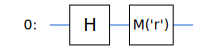

In [ ]:
# Here I'm defining a utility function to print circuits nicely using an svg
from cirq.contrib.svg import circuit_to_svg
from IPython.display import SVG, display
import os

def svg_circuit(circuit):
  """Convert the cirq.Circuit to a temp svg and display + garbage collect."""
  with open("temp.svg", 'w+') as f:
    f.write(circuit_to_svg(circuit))
  display(SVG('temp.svg'))
  os.remove('temp.svg')

# Now we can use the above-defined function anywhere in the notebook
svg_circuit(randomNumberGenerator)

  ### Quantum Simulators

  <p style="text-align: justify;"> 
  Cirq provides two quantum computer simulators, the `Simulator` and the `XmonSimulator`, to locally execute quantum algorithms. The `Simulator` works for generic gates that implement their unitary matrix. The `XmonSimulator` is specialized for the native gate set of Google's quantum computers and can utilize multi-threading to improve performance in certain cases.
  </p>

  <p style="text-align: justify;"> 
  To run the random bit generator circuit above with the `Simulator`, we can do the following:
  </p>

In [ ]:
# get the simulator
simulator = cirq.Simulator()

# run the circuit
out = simulator.run(randomNumberGenerator, repetitions=50)

# get the results and display them
randomNumbers = out.histogram(key="r")
print(randomNumbers)

Counter({1: 27, 0: 23})


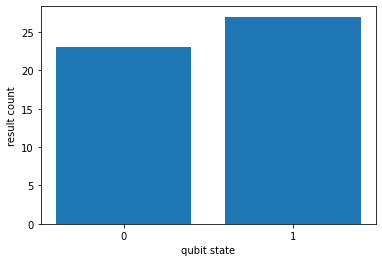

counts = [23. 27.]


In [ ]:
# Display the result as a Histogram
randomHistogram = cirq.plot_state_histogram(out)
print("counts =", randomHistogram)

In [ ]:
"""Print out the architecture of the Bristlecone quantum computer.
The 72-qubit Bristlecone computer, with which quantum supremacy may be demonstrated on, 
can be displayed similarly:"""
s = "Bristlecone has {} qubits arranged as follows:\n"
print(s.format(len(cirq.google.Bristlecone.qubits)))
print(cirq.google.Bristlecone)

Bristlecone has 72 qubits arranged as follows:

                                             (0, 5)────(0, 6)
                                             │         │
                                             │         │
                                    (1, 4)───(1, 5)────(1, 6)────(1, 7)
                                    │        │         │         │
                                    │        │         │         │
                           (2, 3)───(2, 4)───(2, 5)────(2, 6)────(2, 7)───(2, 8)
                           │        │        │         │         │        │
                           │        │        │         │         │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)────(3, 6)────(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │         │         │        │        │
                  │        │        │        │         │         │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)────(4, 6)────(4, 7)───(4,

# Entangle 2 qubits [Bell state]

Create a circuit to generate a Bell State:  
1/sqrt(2) * ( |00> + |11> )

In [ ]:
bell_circuit = cirq.Circuit()
q0, q1 = cirq.LineQubit.range(2)

# apply H-gate
bell_circuit.append(cirq.H(q0))
# apply CNOT Gate
bell_circuit.append(cirq.CNOT(q0, q1))

# display circuit
print(bell_circuit)

# Initialize Simulator
s=cirq.Simulator()

print('Simulate the circuit:')
results=s.simulate(bell_circuit)
print(results)
print()

# For sampling, we need to add a measurement at the end
bell_circuit.append(cirq.measure(q0, q1, key='q'))

print('Sample the circuit:')
samples=s.run(bell_circuit, repetitions=20)

print()
# Print a histogram of results
print(samples.histogram(key='q'))

0: ───H───@───
          │
1: ───────X───
Simulate the circuit:
measurements: (no measurements)
output vector: 0.707|00⟩ + 0.707|11⟩

Sample the circuit:

Counter({0: 10, 3: 10})


In [ ]:
# Result after measurement
print(samples)

q=00011101011011010010, 00011101011011010010


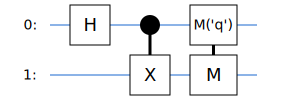

In [ ]:
# diaply the circuit in svg format
svg_circuit(bell_circuit)

You have successfully completed Level-1 of cirq tutorial, and now are equipped to execute Quantum Algorithms using this framework.